In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Machine_Learning_Datasets/Salary_Data.csv')
df.head(7)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [3]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


<Axes: xlabel='Age', ylabel='Count'>

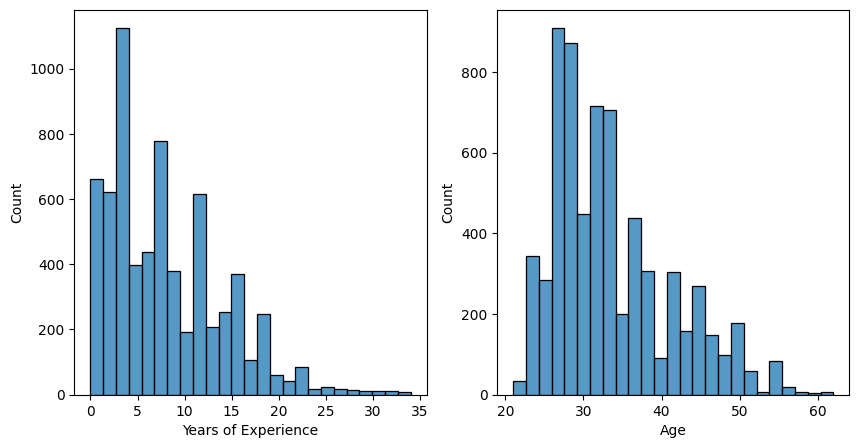

In [4]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.histplot(x = 'Years of Experience', data = df, bins = 25)
plt.subplot(1,2,2)
sns.histplot(x = 'Age', data = df, bins = 25)

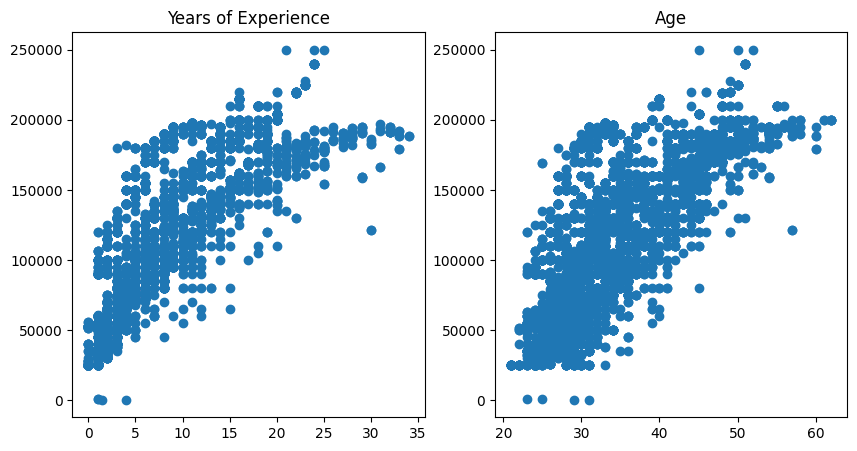

In [5]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.title('Years of Experience')
plt.scatter(x = 'Years of Experience', y = 'Salary',data = df, )
plt.subplot(1,2,2)
plt.title('Age')
plt.scatter(x = 'Age', y ='Salary' ,data = df)

<Axes: title={'center': 'Age'}, xlabel='Age'>

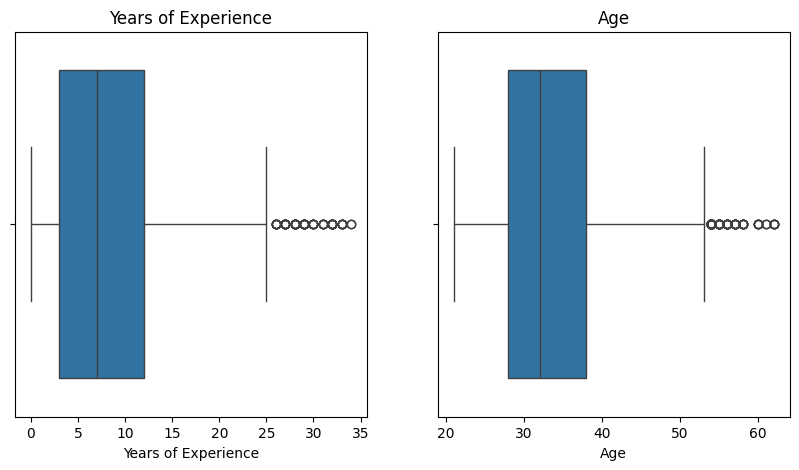

In [6]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.title('Years of Experience')
sns.boxplot(x = 'Years of Experience', data = df)
plt.subplot(1,2,2)
plt.title('Age')
sns.boxplot(x = 'Age', data = df)

<Axes: xlabel='Salary', ylabel='Count'>

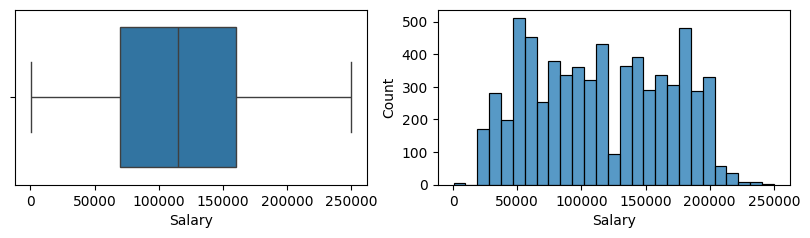

In [7]:
plt.figure(figsize = (10, 5))
plt.subplot(2,2,1)
sns.boxplot(x = 'Salary', data = df)
plt.subplot(2,2,2)
sns.histplot(x = 'Salary', data = df)

In [8]:
df['Salary'].min()

350.0

In [9]:
df_new = df[df['Salary'] < 10000]
df_new.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
259,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,350.0
1890,25.0,Female,Bachelor's Degree,Front end Developer,1.0,550.0
2654,23.0,Male,PhD,Software Engineer Manager,1.0,579.0
4633,31.0,Female,Bachelor's Degree,Junior HR Coordinator,4.0,500.0


<Axes: xlabel='Salary', ylabel='Count'>

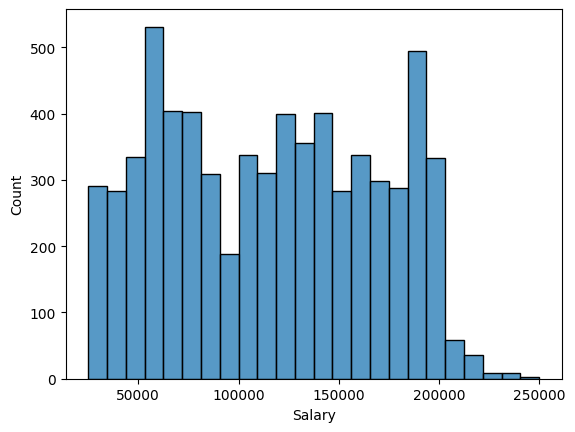

In [10]:
df = df[df['Salary'] > 10000]
sns.histplot(x = 'Salary', data = df)

# ✅ Numerical Data is cleaned. No further cleaning is not needed.

In [11]:
df['Gender'].value_counts()

,count
Gender,
Male,3669
Female,3011
Other,14


<Axes: xlabel='Gender', ylabel='count'>

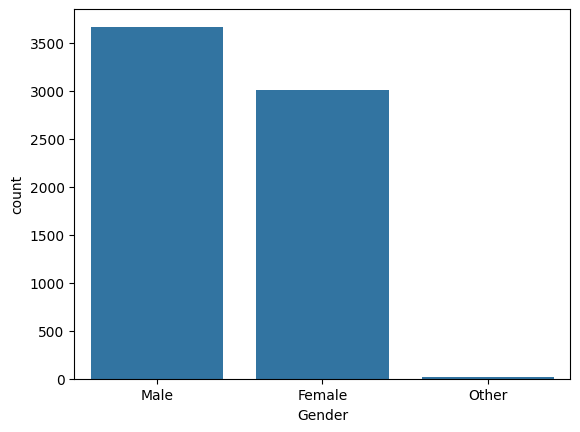

In [12]:
sns.countplot(x = 'Gender', data = df)

<Axes: xlabel='Job Title', ylabel='count'>

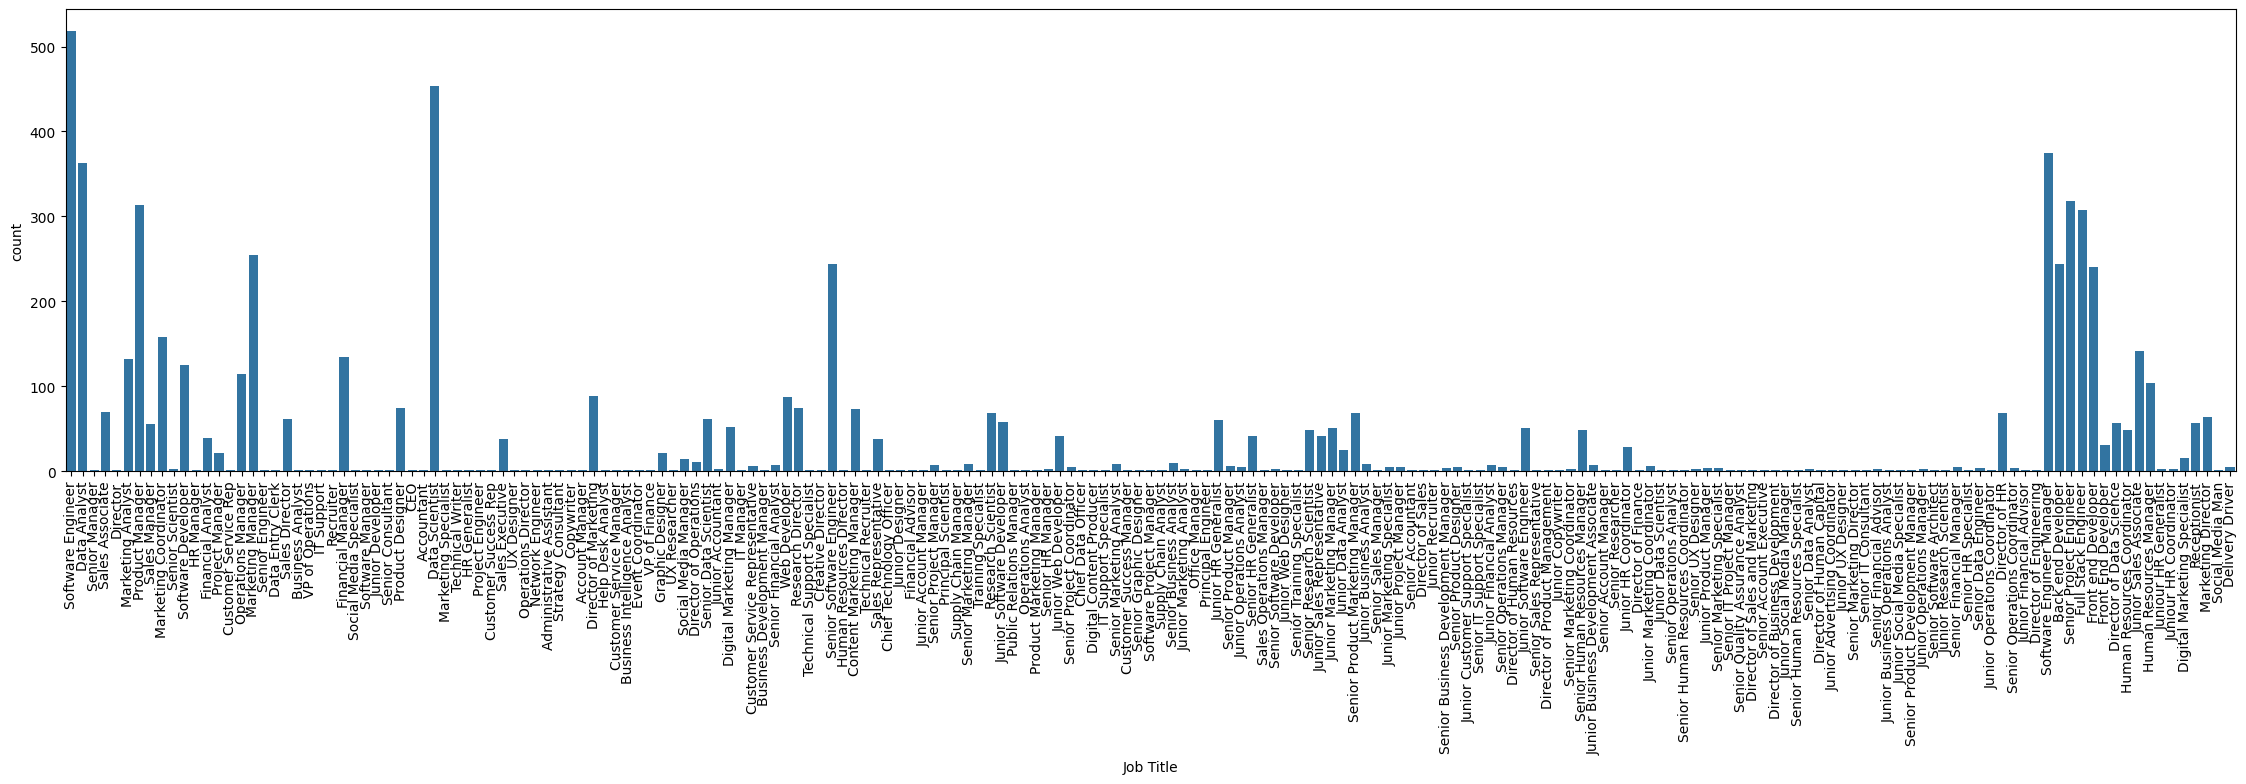

In [13]:
plt.figure(figsize = (28, 6))
plt.xticks(rotation = 90)
sns.countplot(x = 'Job Title', data = df)

### Data is highly unbalanced.

<Axes: xlabel='Education Level', ylabel='count'>

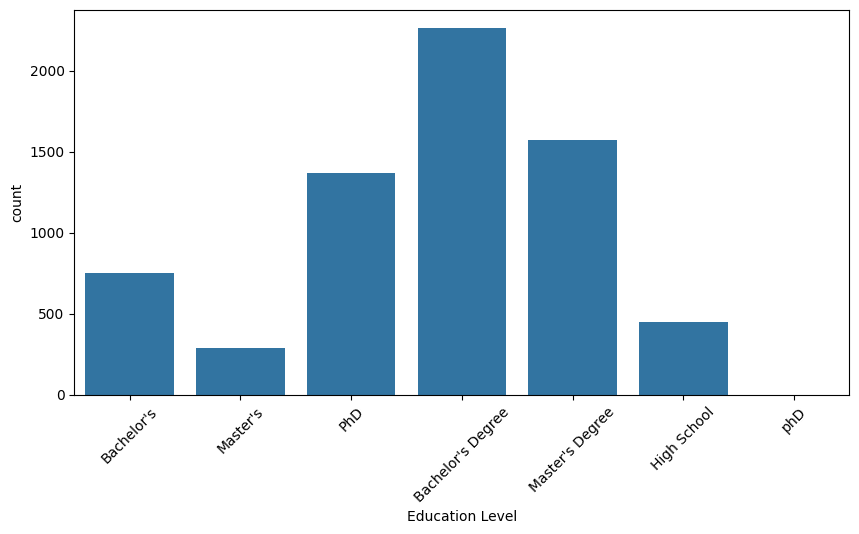

In [14]:
plt.figure(figsize = (10, 5))
plt.xticks(rotation = 45)
sns.countplot(x = 'Education Level', data = df)

In [15]:
df = df.replace({"Bachelor's Degree": "Bachelor's","Master's Degree":"Master's",'phD':'PhD'})
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [16]:
df.to_csv('Salary_Data_Cleaned.csv', index=False)

In [ ]:
df = df.replace({"Bachelor's":1, "Master's":2, 'PhD':3, 'High School':0})

#Mean Encoding
mean_salary = df.groupby('Job Title')['Salary'].mean()
df['Job Title_Mean_Encoded'] = df['Job Title'].map(mean_salary)
display(df[['Job Title', 'Job Title_Mean_Encoded', 'Salary']].head())

#Onehot Encoding
df_encoded = pd.get_dummies(df, columns=['Gender'], dtype=int)

df_encoded.head()


/tmp/ipython-input-1145990957.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Bachelor's":1, "Master's":2, 'PhD':3, 'High School':0})


,Job Title,Job Title_Mean_Encoded,Salary
0,Software Engineer,113243.243243,90000.0
1,Data Analyst,125090.909091,65000.0
2,Senior Manager,160000.000000,150000.0
3,Sales Associate,35857.142857,60000.0
4,Director,200000.000000,200000.0


,Age,Education Level,Job Title,Years of Experience,Salary,Job Title_Mean_Encoded,Gender_Female,Gender_Male,Gender_Other
0,32.0,1,Software Engineer,5.0,90000.0,113243.243243,0,1,0
1,28.0,2,Data Analyst,3.0,65000.0,125090.909091,1,0,0
2,45.0,3,Senior Manager,15.0,150000.0,160000.000000,0,1,0
3,36.0,1,Sales Associate,7.0,60000.0,35857.142857,1,0,0
4,52.0,2,Director,20.0,200000.0,200000.000000,0,1,0


In [ ]:
df_encoded = df_encoded.drop('Job Title', axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded['Years of Experience'] = scaler.fit_transform(df_encoded[['Years of Experience']])
df_encoded['Age'] = scaler.fit_transform(df_encoded[['Age']])
df_encoded['Job Title_Mean_Encoded'] = scaler.fit_transform(df_encoded[['Job Title_Mean_Encoded']])
df_encoded.head()

,Age,Education Level,Years of Experience,Salary,Job Title_Mean_Encoded,Gender_Female,Gender_Male,Gender_Other
0,-0.213644,1,-0.511397,90000.0,-0.050101,0,1,0
1,-0.738897,2,-0.841448,65000.0,0.225389,1,0,0
2,1.493429,3,1.138859,150000.0,1.037119,0,1,0
3,0.311609,1,-0.181346,60000.0,-1.849535,1,0,0
4,2.412621,2,1.963988,200000.0,1.967226,0,1,0


<Axes: >

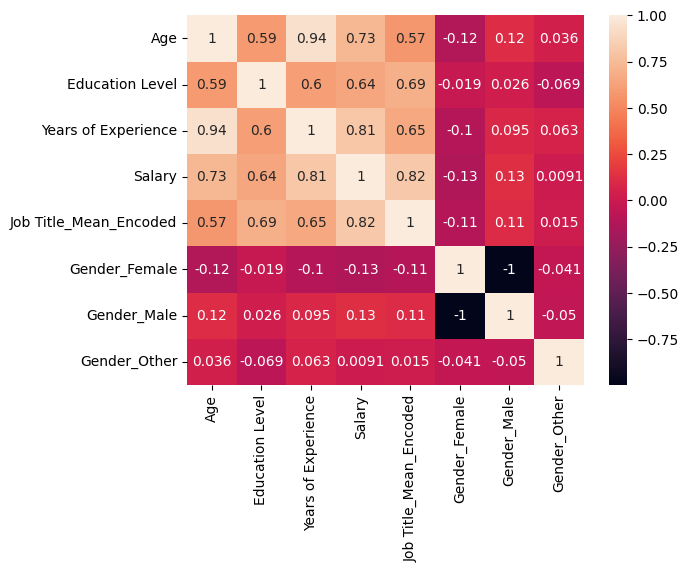

In [ ]:
sns.heatmap(df_encoded.corr(), annot = True, cmap = 'rocket')

In [ ]:
X = df_encoded.drop('Salary', axis = 1)
y = df_encoded['Salary']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)


rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

def regression_metrics_sklearn(y_true, y_pred, n_features):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - n_features - 1)
    return mse, rmse, r2, r2_adj

n_features = X_train.shape[1]

metrics_lin = regression_metrics_sklearn(y_test, y_pred_lin, n_features)
metrics_ridge = regression_metrics_sklearn(y_test, y_pred_ridge, n_features)
metrics_rf = regression_metrics_sklearn(y_test, y_pred_rf, n_features)

In [ ]:
results_sklearn = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression","Random Forest Regression"],
    "MSE": [metrics_lin[0], metrics_ridge[0], metrics_rf[0]],
    "RMSE": [metrics_lin[1], metrics_ridge[1], metrics_rf[1] ],
    "R-Squared": [metrics_lin[2], metrics_ridge[2], metrics_rf[2]],
    "Adjusted R-Squared": [metrics_lin[3], metrics_ridge[3], metrics_rf[3]]
})

display(results_sklearn)

,Model,MSE,RMSE,R-Squared,Adjusted R-Squared
0,Linear Regression,5.492680e+08,23436.466375,0.798910,0.797853
1,Ridge Regression,5.495149e+08,23441.734925,0.798820,0.797762
2,Random Forest Regression,6.018581e+07,7757.951219,0.977966,0.977850


In [ ]:
import joblib

joblib.dump(lin_reg, 'linear_regression_model.pkl')
joblib.dump(rf_reg, 'random_forest_regression_model.pkl')

print("✅")

✅
